In [1]:
import os
import glob
import pandas as pd
import pydot
from IPython.display import SVG

In [2]:
dfs = []
tetrad_images_dir = os.path.join(os.getcwd(), '..', 'data', '9var')
for d in glob.glob(tetrad_images_dir + os.sep + "*.txt"):
    print (d)
    df = pd.read_table(d, sep="\t")
    dfs.append(df)

/home/jovyan/py-causal/example/../data/9var/sub001.cent-table.9.dat.txt
/home/jovyan/py-causal/example/../data/9var/sub016.cent-table.9.dat.txt
/home/jovyan/py-causal/example/../data/9var/sub014.cent-table.9.dat.txt
/home/jovyan/py-causal/example/../data/9var/sub010.cent-table.9.dat.txt
/home/jovyan/py-causal/example/../data/9var/sub013.cent-table.9.dat.txt
/home/jovyan/py-causal/example/../data/9var/sub017.cent-table.9.dat.txt
/home/jovyan/py-causal/example/../data/9var/sub005.cent-table.9.dat.txt
/home/jovyan/py-causal/example/../data/9var/sub009.cent-table.9.dat.txt
/home/jovyan/py-causal/example/../data/9var/sub004.cent-table.9.dat.txt


In [3]:
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm()

In [4]:
from pycausal import search as s
tetrad = s.tetradrunner()
tetrad.getAlgorithmParameters(algoId = 'imgs_cont', testId = 'fisher-z')

penaltyDiscount: Penalty discount (min = 0.0) (java.lang.Double) [default:2.0]
faithfulnessAssumed: Yes if (one edge) faithfulness should be assumed (java.lang.Boolean) [default:true]
symmetricFirstStep: Yes if the first step step for FGES should do scoring for both X->Y and Y->X (java.lang.Boolean) [default:false]
maxDegree: The maximum degree of the graph (min = -1) (java.lang.Integer) [default:100]
verbose: Yes if verbose output should be printed or logged (java.lang.Boolean) [default:false]
bootstrapSampleSize: The number of bootstraps (min = 0) (java.lang.Integer) [default:0]
bootstrapEnsemble: Ensemble method: Preserved (0), Highest (1), Majority (2) (java.lang.Integer) [default:1]
numRuns: The number runs (java.lang.Integer) [default:1]
randomSelectionSize: The number of datasets that should be taken in each random sample (java.lang.Integer) [default:1]
bootstrapSampleSize: The number of bootstraps (min = 0) (java.lang.Integer) [default:0]
bootstrapEnsemble: Ensemble method: Pre

In [5]:
tetrad.run(algoId = 'imgs_cont', dfs = dfs, testId = 'fisher-z', verbose = True)

In [6]:
tetrad.getNodes()

['LOCC', 'LACC', 'LIFG', 'LIPL', 'ROCC', 'RACC', 'RIFG', 'RIPL', 'I']

In [7]:
tetrad.getEdges()

['LIPL --> RIPL',
 'RIPL --> RIFG',
 'LOCC --> ROCC',
 'LACC --> RACC',
 'RIPL --> RACC',
 'LOCC --> I',
 'LIPL --- LIFG',
 'LIFG --- LACC',
 'LIPL --> LOCC',
 'LIFG --> RIFG',
 'ROCC --> RIPL',
 'LACC --> LOCC']

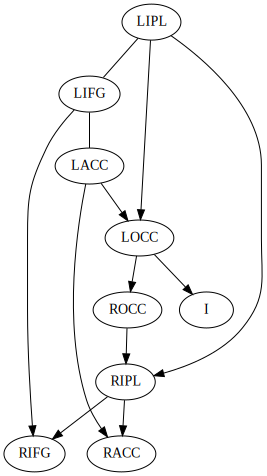

In [8]:
dot = tetrad.getDot()
svg_str = dot.create_svg(prog='dot')
SVG(svg_str)

In [9]:
pc.stop_vm()